In [1]:
# Dependencies and Setup
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st
import os
from config import destination_zip, col_types

In [2]:
# read csv in zip pandas automatically selects the csv residing within the zip
accidents_df = pd.read_csv(destination_zip, 
                           usecols=col_types.keys(), 
                           dtype=col_types, 
                           parse_dates=['Start_Time'],
                           infer_datetime_format=True)

accidents_df.head()

,ID,Severity,Start_Time,Start_Lat,Start_Lng,City,County,State,Zipcode,Sunrise_Sunset
0,A-426,2,2016-03-01 05:05:42,39.945835,-83.061295,Columbus,Franklin,OH,43204-3157,Night
1,A-427,2,2016-03-01 06:14:44,39.591389,-84.229485,Miamisburg,Montgomery,OH,45342-4940,Night
2,A-428,2,2016-03-01 07:30:18,39.790302,-84.213905,Dayton,Montgomery,OH,45405-3032,Day
3,A-429,2,2016-03-01 07:31:53,39.927441,-83.056198,Columbus,Franklin,OH,43223,Day
4,A-430,2,2016-03-01 07:46:03,39.946892,-82.915489,Columbus,Franklin,OH,43209-3047,Day


In [3]:
# Chris's code starts here

In [4]:
#Isolate Start Time and sort by day of week
accidents_df["Start_Time"].dt.dayofweek.value_counts()

1    572369
4    572048
2    567263
3    558199
0    533423
5    185322
6    162539
Name: Start_Time, dtype: int64

In [5]:
#Create DataFrame to store number of accidents per day of week
week_days_df = pd.DataFrame(accidents_df['Start_Time'].dt.dayofweek.value_counts())
week_days_df.sort_index(inplace=True)
week_days_df.set_index(pd.Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']), inplace=True)
week_days_df

,Start_Time
Monday,533423
Tuesday,572369
Wednesday,567263
Thursday,558199
Friday,572048
Saturday,185322
Sunday,162539


Text(0, 0.5, 'Number of Accidents')

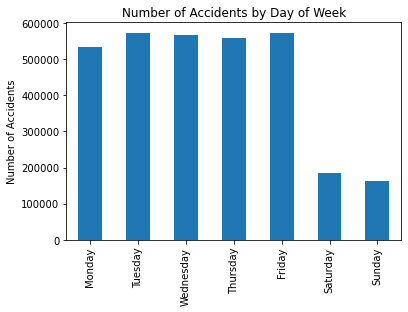

In [6]:
#Create bargraph from DataFrame
plotdata = week_days_df.plot.bar(rot="vertical", title="Number of Accidents by Day of Week", legend=False)
plotdata.set_ylabel("Number of Accidents")

In [9]:
#Make a DataFrame to track on severity of crash by day of week
daysofweek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
severity_values = [1, 2, 3, 4]
days = days_of_week * len(severity_values)
severity = np.repeat(severity_values,len(daysofweek))
severity_df = pd.DataFrame(zip(severity, days), columns=['Severity', 'Days'])
vals = []
for index, row in severity_df.iterrows():
    vals.append(accidents_df[(accidents_df['Severity'] == row['Severity']) & (accidents_df['Start_Time'].dt.dayofweek == daysofweek.index(row['Days']))]['ID'].count())
severity_df.insert(2, 'Value', vals)
severity_df

,Severity,Days,Value
0,1,Monday,211
1,1,Tuesday,177
2,1,Wednesday,200
3,1,Thursday,196
4,1,Friday,243
5,1,Saturday,93
6,1,Sunday,67
7,2,Monday,373240
8,2,Tuesday,401512
9,2,Wednesday,397963


In [12]:
#Define the summary table
pivot_df = severity_df.pivot(index='Days', columns='Severity', values='Value')
pivot_df = pivot_df.loc[daysofweek]
pivot_df

Severity,1,2,3,4
Days,,,,
Monday,211,373240,144869,15103
Tuesday,177,401512,155181,15499
Wednesday,200,397963,154146,14954
Thursday,196,387944,155172,14887
Friday,243,393894,162303,15608
Saturday,93,95610,79288,10331
Sunday,67,83170,69476,9826


Text(0, 0.5, 'Number of Crashes')

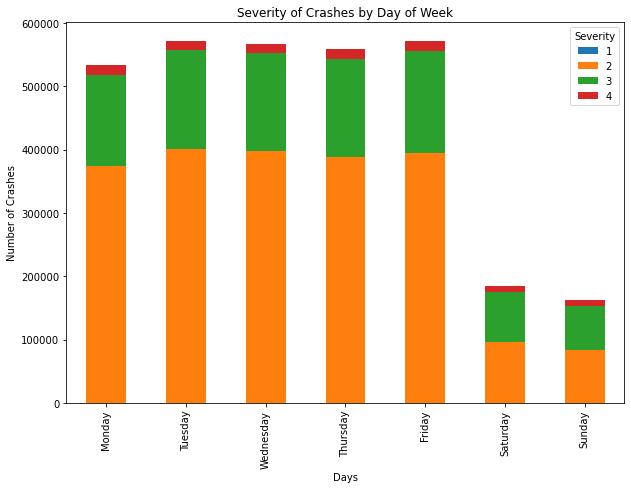

In [11]:
severities = [1, 2, 3, 4]
pivot_df.loc[:,severities].plot.bar(stacked=True, figsize=(10,7))
plt.title("Severity of Crashes by Day of Week")
plt.ylabel("Number of Crashes")

In [ ]:
# Chris's code ends here

In [ ]:
# Colleen's code starts here

In [ ]:
# Colleen's code ends here

In [ ]:
# Ken's code starts here
#Grouping Data Into Seasons
# In order to group dates into seasons, we need to define seasons then group the dates into seasons column using  Meteorological seasons classifications for northern hemisphere
#Spring runs from March 1 to May 31;
#Summer runs from June 1 to Aug.31;
#Fall (Autumn) runs from September 1st thru Nov.30th and
#Winter runs from December 1 to 28 Feb


month_seasons = {1: 'winter',
                 2: 'winter',
                 3: 'spring',
                 4: 'spring',
                 5: 'spring',
                 6: 'summer',
                 7: 'summer',
                 8: 'summer',
                 9: 'fall',
                 10: 'fall',
                 11: 'fall',
                 12: 'winter'}

accidents_df['seasons'] = pd.to_datetime(accidents_df['Start_Time']).dt.month.map(month_seasons)
accidents_df.tail(50000)

In [ ]:
#Create DataFrame to group number of accidents per season
# separate season data into bins
# Create Two bins for 'Winter' for being both at the beginning and end of the year.

season_group = accidents_df.groupby(['seasons'])


season_group = season_group['ID'].count().plot.bar(rot="vertical", title="Number of Accidents by season", legend=False)
season_group.set_ylabel("Number of Accidents")





In [ ]:
# Ken's code ends here

In [ ]:
# Eric's code starts here

In [ ]:
# Eric's code ends here